# Social Network Analysis
### By Amir E. Fard
### a.ebrahimifard@tudelft.nl

# Outline
- Laying down the foundation
    - Why network
    - Graph, network, social network
    - Some theoretical background
    - Network elements
    - Path and cycle
    - Network representation
- Network types
    - Networks with attributes
    - Directed / Undirected network
- Building the networks
- Network analysis
    - Node metrics
    - Structural metrics
- Advanced topics
    - Erdos-Renyi random graphs
    - Scale Free Networks

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import collections
from IPython.display import Image

# Why network?
## - It captures the relationships of the datapoints/components relationships
## - It allows us to to study the macro behaviour of a system from the micro behaviour of its components (e.g. spread of diseases, citation patterns, collaboration between organisations, energy grids, ... )

In [17]:
image_football = Image("./figs/football.png")
#Pappalardo, L., Cintia, P., Rossi, A., Massucco, E., Ferragina, P., Pedreschi, D., & Giannotti, F. (2019). A public data set of spatio-temporal match events in soccer competitions. Scientific data, 6(1), 1-15.

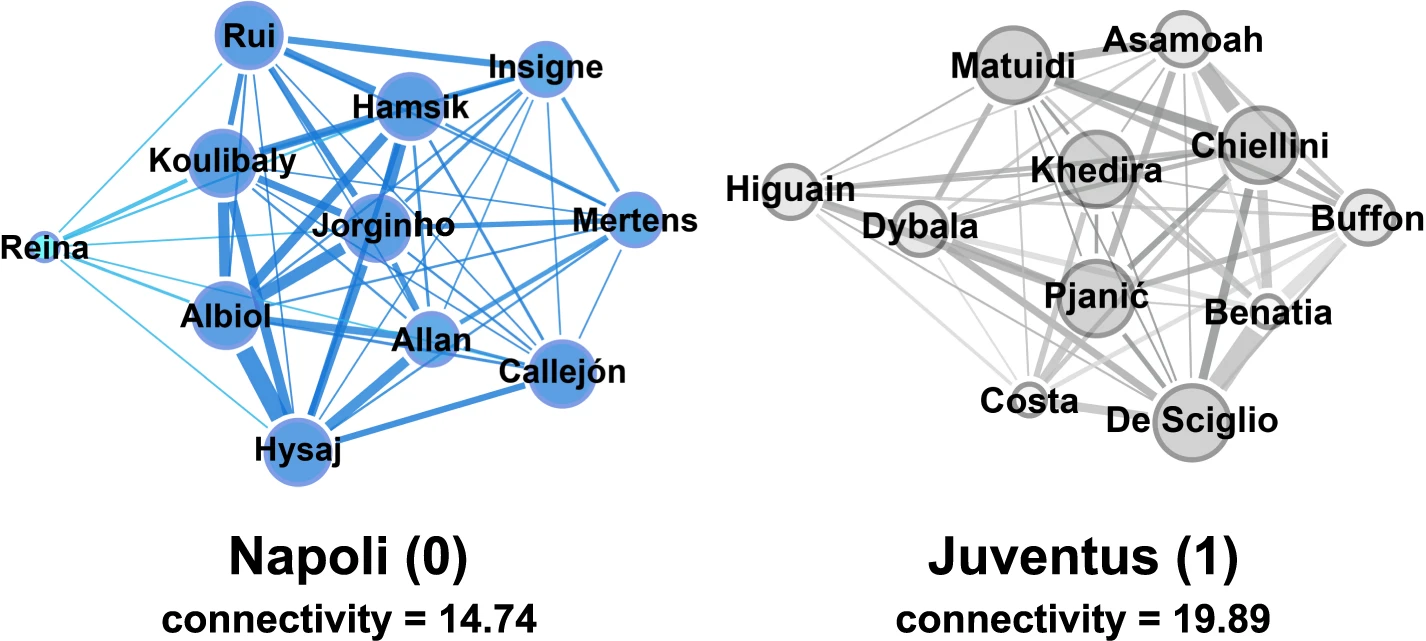

In [18]:
image_football

In [19]:
image_interlocks = Image("./figs/interlocks.png")

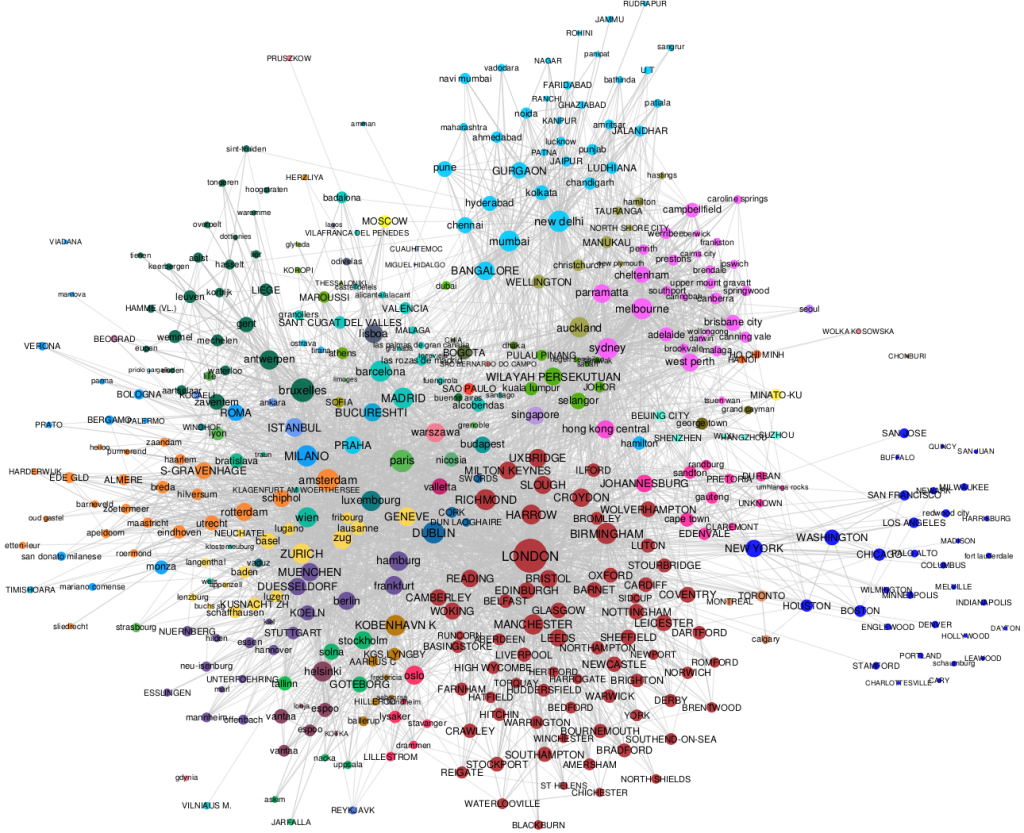

In [20]:
#board interlocks: shared senior level directors between firms
#The center of the city network based on board interlocks. Node color corresponds to the city’s country, node size is proportional to the city’s betweenness centrality value.
#It is evident that London has by far the most dominant position in this network. Globally, London plays a crucial role in connecting the global corporate elite through short path lengths.

image_interlocks
#https://blogs.lse.ac.uk/businessreview/2016/07/15/network-science-shows-london-is-at-the-heart-of-the-worlds-corporate-elite/

In [21]:
image_art = Image("./figs/art.jpg")
# Fraiberger, S. P., Sinatra, R., Resch, M., Riedl, C., & Barabási, A. L. (2018). Quantifying reputation and success in art. Science, 362(6416), 825-829.
# Coexhibition network: The nodes are institutions (galleries, museums). Node size is proportional to each institution’s eigenvector centrality. Nodes are connected if they both exhibited the same artist, with link weightsbeing equal to the number of artists’coexhibitions. Node colors encode the region in which institutions are located. Links are of the same colors astheir end nodes, or gray when end nodes have different colors.

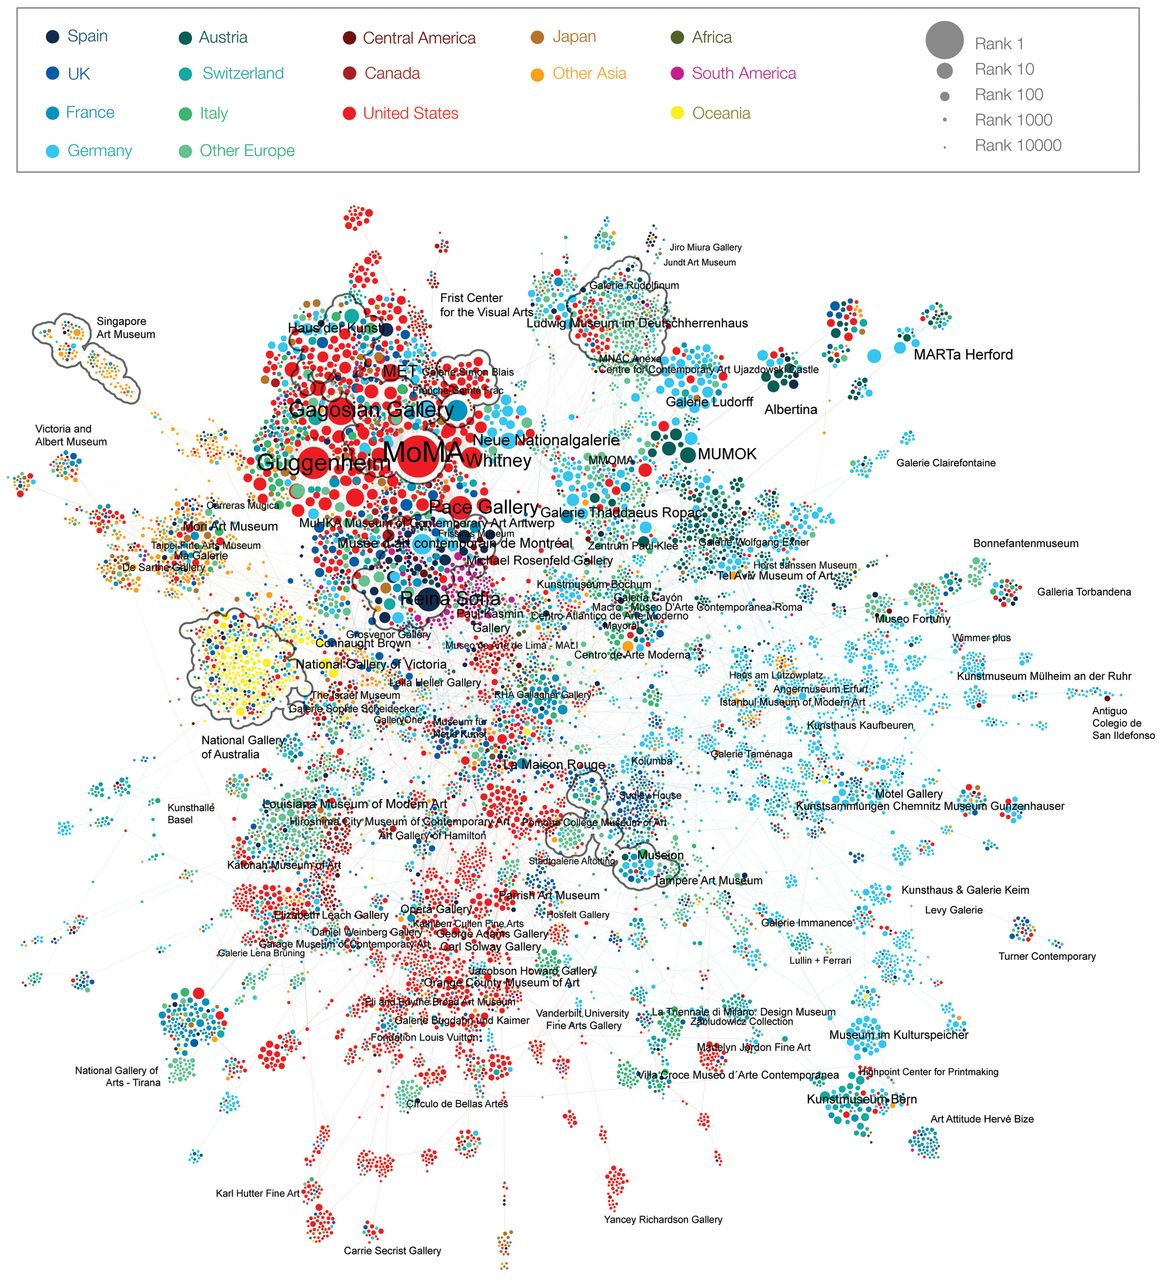

In [22]:
image_art

### Question) Is dissemination of a virus among individuals in a society a network problem?

# Graph, network, and social network
### - Graph: Mathematical perspective (Vertex, Edge)
### - Network: Physics, Social science perspective (Node, Link)
### Depending on the topic of interest the network analysis takes various names (e.g. social network, organisational network, ...)

# Some theoretical background
### Networks have been used for developing theories in social science
- Six degrees of separation or small-world experiment (Milgram 1967)
- The strength of weak ties (Granovetter 1973)


In [23]:
image14 = Image('./figs/small-world2.PNG')

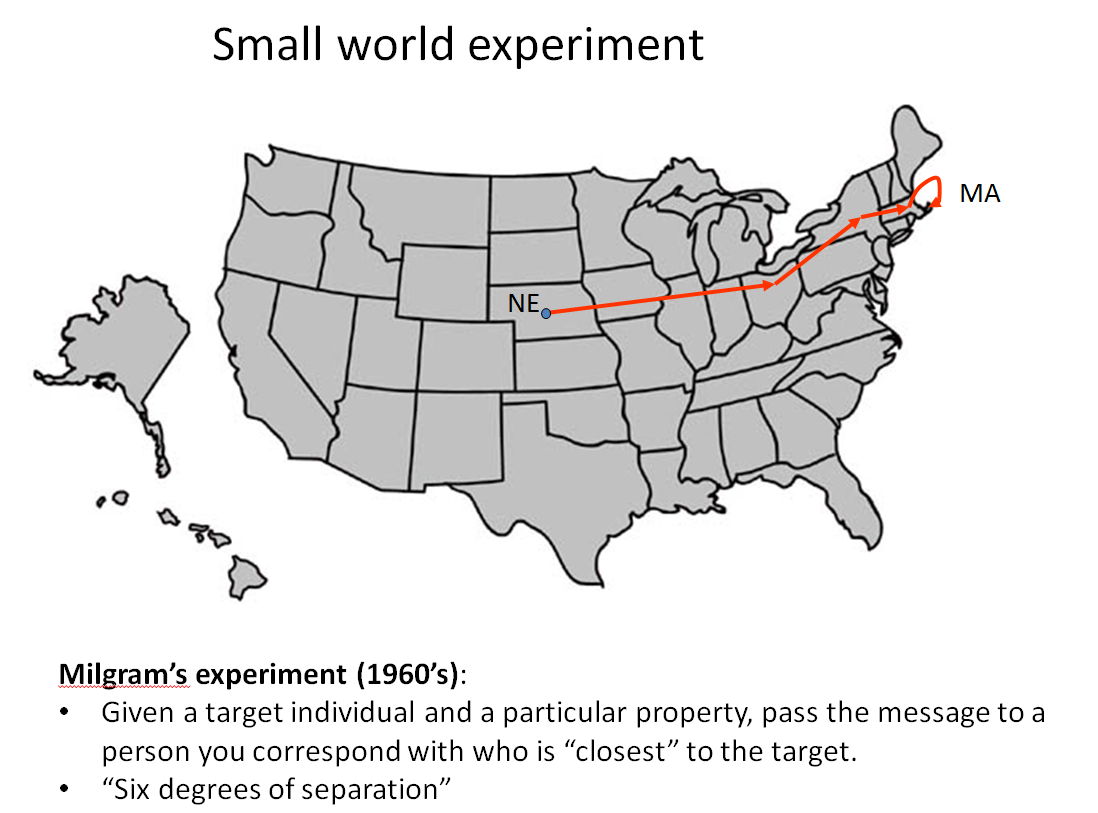

In [24]:
image14

In [25]:
strength_weak_ties = Image("./figs/strengthWeakTies.png")

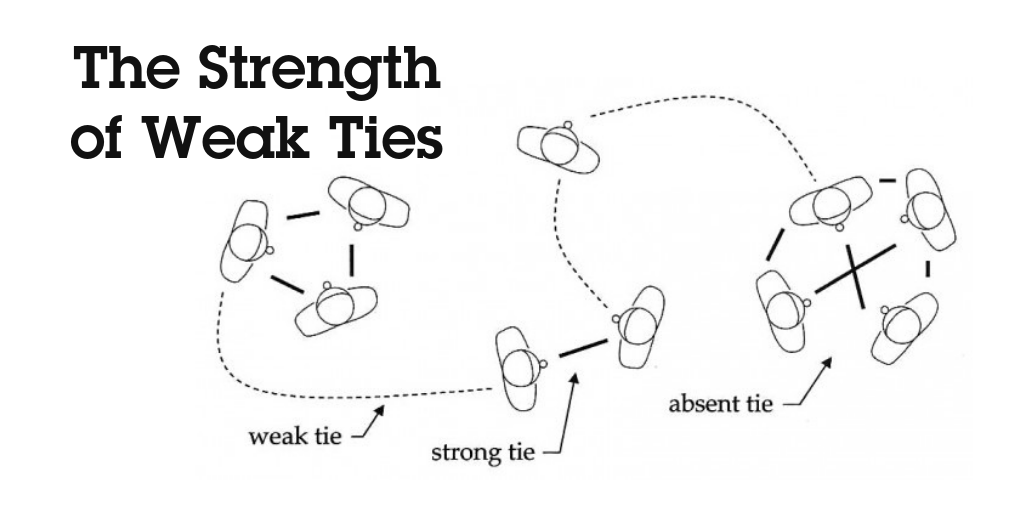

In [26]:
strength_weak_ties

### - In social networks, you have different links — or ties — to other people. 
### - Strong ties are characterized as deep affinity; for example family, friends or colleagues. 
### - Weak ties, in contrast, might be acquaintances, or a stranger with a common cultural background. 
### - The point is that the strength of these ties can substantially affect interactions, outcomes and well-being.
### - For instance, within a network of strong ties, people with weak ties outside the core network are bridges to other networks. Those bridges have access to new and unique information — like job openings — relative to other members of the network with only strong ties.

# Network elements
### - Node
### - Edge

D:\Users\aebrahimifard\AppData\Local\Continuum\anaconda3\envs\myenv03\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


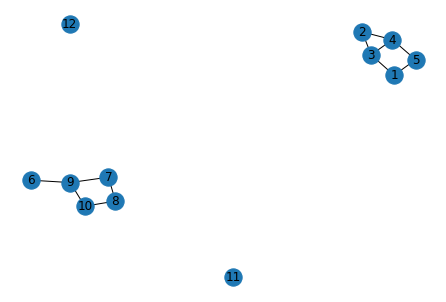

In [27]:
# Making graph
G = nx.Graph()

# Adding the nodes
G.add_node(1)
G.add_nodes_from([2,3,4,5])
G.add_node(6)
G.add_nodes_from([7,8,9,10])
G.add_node(11)
G.add_node(12)

# Adding the edges
G.add_edge(1,3)
G.add_edge(*(1,5))
G.add_edges_from([(2,4), (4,5), (3,4), (10,9), (2,3)])
G.add_edges_from([(7,9), (7,8), (8,10), (6,9)])

# Visualization
# nx.draw(G, with_labels=True)
# nx.draw_kamada_kawai(G, with_labels=True)
# nx.draw_networkx(G, with_labels=True)
# nx.draw_random(G, with_labels=True)
# nx.draw_shell(G, with_labels=True)
# nx.draw_spectral(G, with_labels=True)
nx.draw_spring(G, with_labels=True)
plt.show()

# Path, geodesics and cycle
### Path: a sequence of nodes (which, by most definitions, are all distinct) 
### Geodesics: the shortest path between two nodes
### Cycle: a non-empty path in which the only repeated nodes are the first and last vertices.
### Eulerian cycle: a path that crosses every edge in G exactly once and finishes at the starting node.
### Hamiltonian path: a path that visits each vertex exactly once.

In [28]:
path_geodesic_cycle = Image("./figs/path_geodesic_cycle.png")

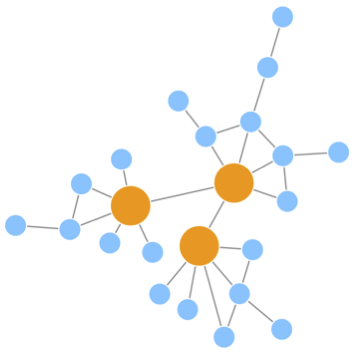

In [29]:
path_geodesic_cycle

In [30]:
eulerian_cycle = Image("./figs/eulerian_cycle.png")

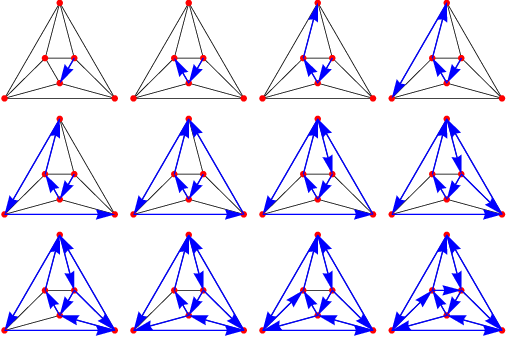

In [31]:
eulerian_cycle

In [32]:
# Note: In a connected graph, If every node has even degree, the graph has eulrian cycle
# Example: Municipality wants to clean all the streets after christmas. If they can find a hamiltonian cycle then it would be an optimsed route 

In [33]:
hamiltonian_cycle = Image("./figs/hamiltonian_cycle.png")

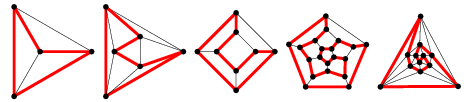

In [34]:
hamiltonian_cycle

In [35]:
# EXAMPLE : Optimzed route for post.nl to deliver the packages

### Question) Can you think of any application for eulerian/hamiltonian cycle?

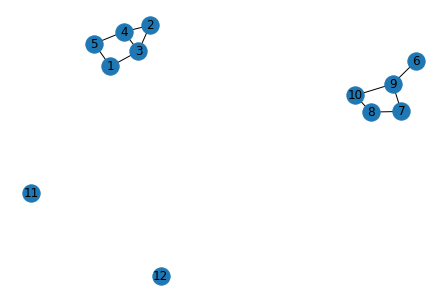

In [36]:
# First we visualize the graph
nx.draw(G, with_labels=True)
plt.show()

In [37]:
# In calculating the shortest path between nodes in a graph, a very important point is to know whether the graph is connected or disconnected. If it's a connected graph there is no problem, otherwise in disconnected graph, the shortest path algorithm should applied on the connected components
condition = nx.is_connected(G)
sourceNode = "1"
targetNode = "30"
if condition:
    print(nx.shortest_path_length(G, source=sourceNode, target=targetNode))
    print(nx.shortest_path(G, source=sourceNode, target=targetNode))
    print(list(nx.shortest_paths.all_shortest_paths(G, source=sourceNode, target=targetNode)))
    # A simple path is a path with no repeated nodes
    simplePaths = list(nx.simple_paths.all_simple_paths(G, source=sourceNode, target=targetNode))

In [38]:
nx.cycle_basis(G)

[[3, 4, 5, 1], [3, 2, 4], [10, 8, 7, 9]]

In [39]:
EG = nx.Graph()
EG.add_edges_from([(1,2),(1,3),(2,3)])
if nx.is_eulerian(EG):
    for a  in nx.eulerian_circuit(EG):
        print(a)

(1, 3)
(3, 2)
(2, 1)


In [40]:
# Hamiltonian cycle
HG = nx.DiGraph()
HG.add_edges_from([(1,2),(2,3),(3,4),(4,1)])
nx.tournament.hamiltonian_path(HG)

[1, 2, 3, 4]

Maybe you noticed, the difference between hamiltonian and eulerian cycle is really small. An Euler path is a path that crosses every edge exactly once without repeating, if it ends at the initial vertex then it is Euler cycle. A Hamiltonian path passes through each vertex (note not each edge), exactly once, if it ends at the initial vertex then it is a Hamiltonian cycle

# Network representation
### Mathematics: G = (V,E)
### Computer scienc: Matrix
### Every where: Visualisation

# Network types
### - Network with attributes: Edges represent an attribute 
    - the amount of time two individual spends with each other instead of just friendship existence in friendship network
    - the amount of common border instead of just border existence in countries network
### - Directed network vs undirected network
    - dircted: import/export networks, influence network (followership network), communication network, ...
    - undirected: transportation network (roads, rails, airport),  

In [41]:
# Node attribute
G =nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,3),(4,5),(5,6),(7,8),(3,6),(4,8)])
# G.nodes is the method to associate an attribute to an existing node 
for i in G.nodes:
    if i%2 == 0:
        G.nodes[i]["colour"] = "Red"
    else:
        G.nodes[i]["colour"] = "Blue"
    G.nodes[i]["name"] = f'Node {i}'

G.add_node(9,colour="Yellow")
G.nodes.data()

NodeDataView({1: {'colour': 'Blue', 'name': 'Node 1'}, 2: {'colour': 'Red', 'name': 'Node 2'}, 3: {'colour': 'Blue', 'name': 'Node 3'}, 4: {'colour': 'Red', 'name': 'Node 4'}, 5: {'colour': 'Blue', 'name': 'Node 5'}, 6: {'colour': 'Red', 'name': 'Node 6'}, 7: {'colour': 'Blue', 'name': 'Node 7'}, 8: {'colour': 'Red', 'name': 'Node 8'}, 9: {'colour': 'Yellow'}})

In [42]:
# Edge attribute
G =nx.Graph()
G.add_edges_from([(u,random.randint(1,11),
                   {"weight": random.uniform(1,10), "colour":random.choice(["Red", "Blue"])}
                  ) 
                  for u in  range(1,10)
                 ])
G.edges.data()

EdgeDataView([(1, 9, {'weight': 4.048360714623987, 'colour': 'Blue'}), (1, 6, {'weight': 8.689729892473018, 'colour': 'Red'}), (9, 4, {'weight': 7.15088571831213, 'colour': 'Blue'}), (9, 10, {'weight': 6.383047805634391, 'colour': 'Blue'}), (2, 2, {'weight': 3.3309908270486006, 'colour': 'Blue'}), (2, 5, {'weight': 2.7449829336318055, 'colour': 'Red'}), (3, 10, {'weight': 9.134765064092925, 'colour': 'Red'}), (5, 8, {'weight': 2.381366955549326, 'colour': 'Blue'}), (6, 7, {'weight': 2.320496797811617, 'colour': 'Red'})])

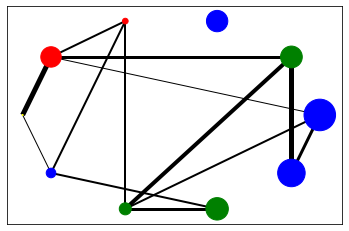

In [43]:
# Visualization based on attributes
# Here, we added size & colour to the nodes and weight to the edges
G = nx.generators.random_graphs.fast_gnp_random_graph(10,0.25)
edgeWeights = [random.randint(1,5) for i in range(10)]
nodeSize = [random.randint(1,1000) for i in range(10)]
nodeColour = [random.choice(["r","b", "green", "yellow"]) for i in range(10)]


pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=nodeSize, node_color=nodeColour)
nx.draw_networkx_edges(G, pos, width=edgeWeights)
plt.show()

D:\Users\aebrahimifard\AppData\Local\Continuum\anaconda3\envs\myenv03\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


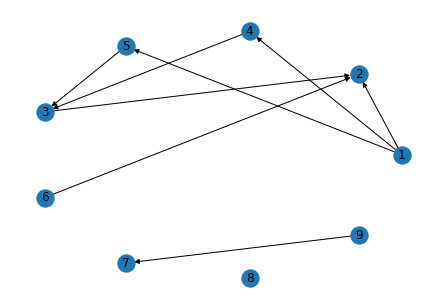

In [44]:
DG = nx.DiGraph()
DG.add_edge(1,2)
DG.add_edges_from([(1,4),(1,5),(5,3)])
DG.add_edge(3,2)
DG.add_edges_from([(4,3),(6,2)])
DG.add_nodes_from([7,8,9])
DG.add_edge(9,7)
nx.draw_circular(DG, with_labels=True)
plt.show()

# Question) Imagine there are four actors and you want to show the negotiation power between them. How are you going to visualise the negotiation power network to a group of high level policy makers given the fact that 


# A>B - C>A - D>A - C>B - D>B - D>C ?


# Building the networks
### Nodes?
### Links?
### Directed?
### Weighted?
### Boundary?
### You can add other properties when you visualise your graph (e.g. node/edge color, node size, ... )

In [45]:
# Building the networks
### Nodes : It depends on the research question => Unit of analysis 
### Links: 
### Directed?
### Weighted?
### Boundary?
### You can add other properties when you visualise your graph (e.g. node/edge color, node size, ... )

# Question) Imagine an earthquake hit city X. Many humanitarian organisations set off to that city. Many volounteers also join the aid operation. You want to understand the collaboration mechanisms during this disaster. How does your network look like?

# Network analysis
### Node metrics
- Degrees and degree distribution
- Centrality measures

# Degrees and degree distribution

In [46]:
degree = Image("./figs/degree.png")

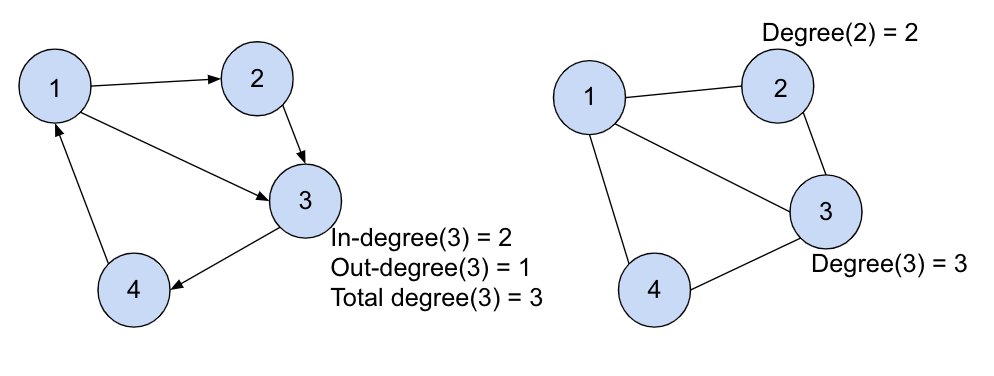

In [47]:
degree

In [48]:
degree_distribution = Image("./figs/degree_distribution.jpg")

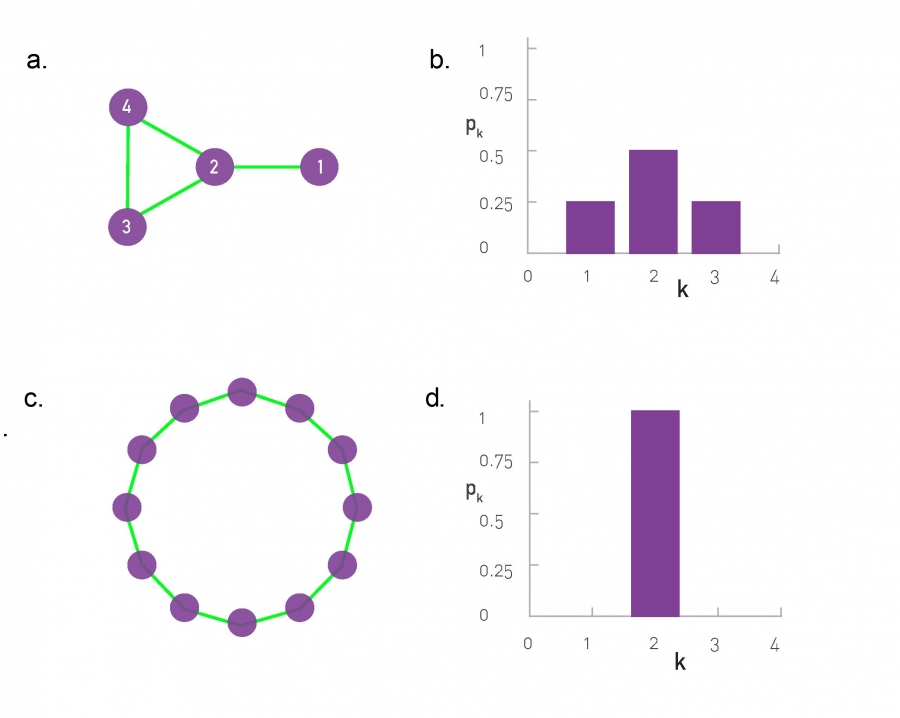

In [49]:
degree_distribution

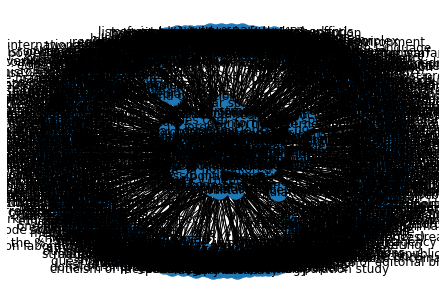

In [50]:
# This is the network of fake-news related concepts in wikipedia 
wikipediaFakeNewsAdr = "./Dataset/graph_100.gexf"
wikipediaConcepts = nx.read_gexf(wikipediaFakeNewsAdr)
nx.draw(wikipediaConcepts, with_labels=True)
plt.show()

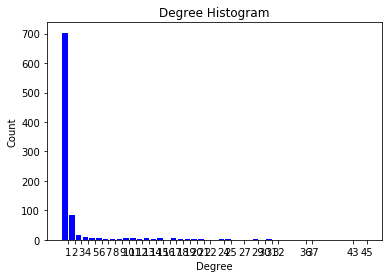

In [51]:
# Degree distribution
degree_sequence = sorted([d for n, d in wikipediaConcepts.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=.80, color='b')


plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

# Centrality measures
- degree centrality
    - C(i) ~ k(i) (centrality of node i changes by degree of that node)
    - Based on degree centrality, the more connection a node has, the more important that node is. Airport, citation
    and friendship are the cases that degree centrality works well

- closeness centrality
    - This measure is calculated via C = 1/L(i) which L(i) denotes the average distance of node i to all the others.
    Collaboration networks is a case that closeness centrality works well 
    - Closeness centrality doesn't span much
    
- betweenness centrality
    - C(i) ~ # shortest paths between all pairs passing through node i
    - Very large span for large networks
- eigenvector centrality
    - The philosophy underneath this centrality measure: Important nodes are connected to important nodes
    - Eigen vector centrality is a recursive approach
    - Eigenvector centrality is a variation of degree centrality. However, unlike degree centrality, which gives
    equal weights to all the neighbors, eigenvector centrality weights adjacent nodes by their centrality:

- page-rank centrality
    - PageRank is a variant of eigenvector centrality and was popularized in the original algorithm used by Google for
    ordering its
    - search results. The PageRank measure was initially proposed for link analysis in the World Wide Web.
    - PageRank, named after Google co-founder Larry Page, is one of the algorithms that Google uses to rank websites
    in its search results. 
    - PageRank works by counting the number and quality of links to a page to determine a rough estimate of how
    important the website is. 
    - The main assumption behind the algorithm is that more important websites are more likely to receive links from
    other websites. 
    - On this basis the algorithm assigns a weight to each of the nodes in a network.


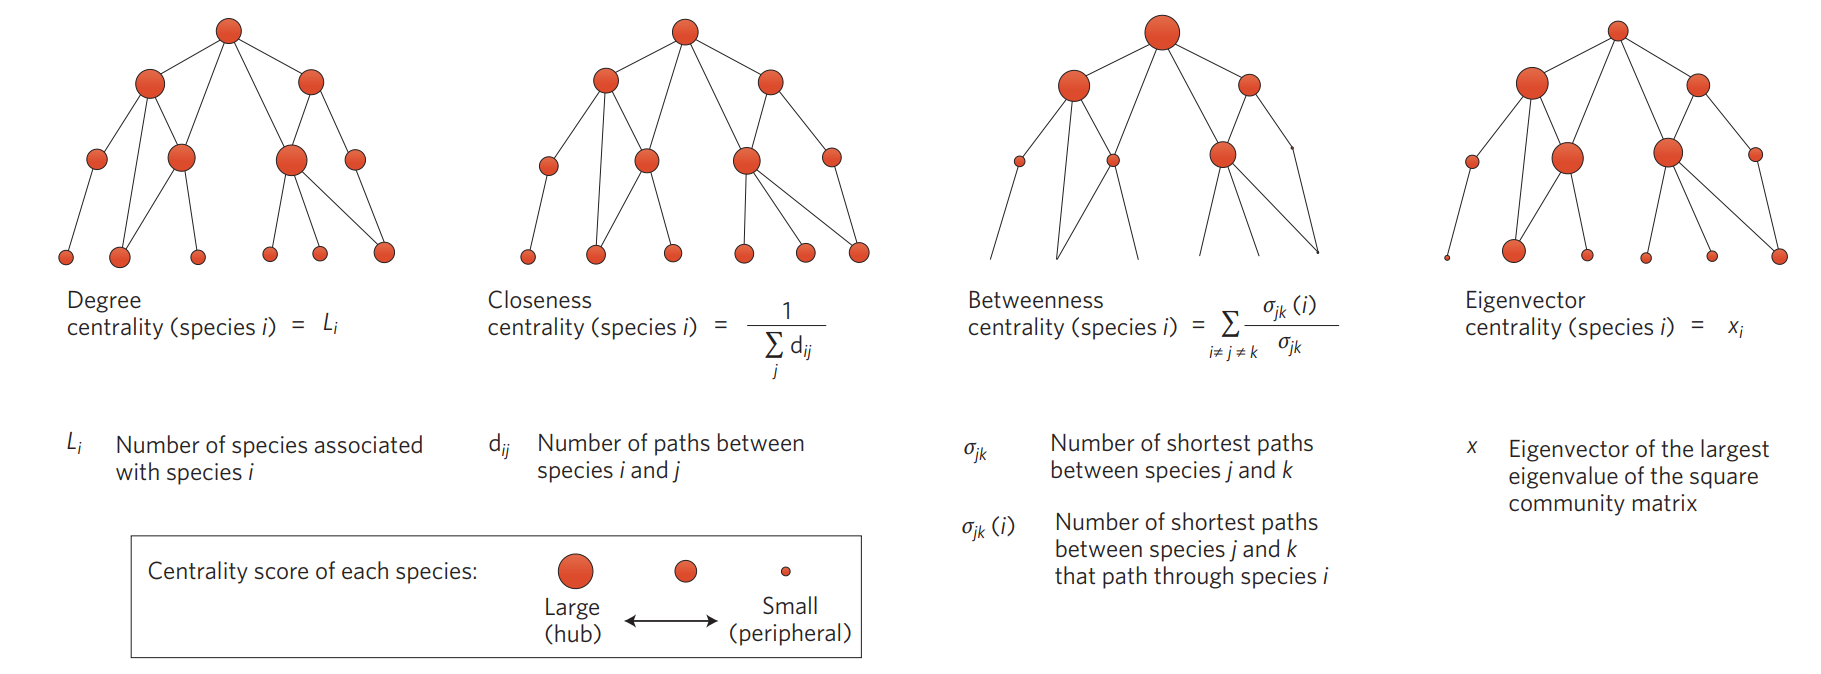

In [52]:
image4 = Image('./figs/centrality.PNG')
image4

# Reference: Toju, H., Yamamichi, M., Guimaraes Jr, P. R., Olesen, J. M., Mougi, A., Yoshida, T., & Thompson, J. N. (2017). Species-rich networks and eco-evolutionary synthesis at the metacommunity level. Nature ecology & evolution, 1(2), 0024.

In [53]:
# Degree centrality
# C(i) ~ k(i) (centrality of node i changes by degree of that node)
# Based on degree centrality, the more connection a node has, the more important that node is. Airport, citation and friendship are the cases that degree centrality works well
# When to use it: For finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.
degreeCentrality = nx.degree_centrality(G)

In [54]:
# Closeness centrality
# This measure is calculated via C = 1/L(i) which L(i) denotes the average distance of node i to all the others. Collaboration networks is a case that closeness centrality works well 
# Closeness centrality doesn't span much
# When to use it: For finding the individuals who are best placed to influence the entire network most quickly.
closenessCentrality = nx.closeness_centrality(G)

In [55]:
# Betweenness centrality
# C(i) ~ # shortest paths between all pairs passing through node i
# Very large span for large networks
# When to use it: For finding the individuals who influence the flow around a system.
betweennessCentrality = nx.betweenness_centrality(G)

In [56]:
# Eigenvector centrality
# The philosophy underneath this centrality measure: Important nodes are connected to important nodes
# Eigen vector centrality is a recursive approach
# Eigenvector centrality is a variation of degree centrality. However, unlike degree centrality, which gives equal weights to all the neighbors, eigenvector centrality weights adjacent nodes by their centrality:
eigenvectorCentrality = nx.eigenvector_centrality(G)

In [57]:
# Page Rank centrality
# PageRank is a variant of eigenvector centrality and was popularized in the original algorithm used by Google for ordering its
# search results. The PageRank measure was initially proposed for link analysis in the World Wide Web.
# PageRank, named after Google co-founder Larry Page, is one of the algorithms that Google uses to rank websites in its search results. 
#PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. 
# The main assumption behind the algorithm is that more important websites are more likely to receive links from other websites. 
# On this basis the algorithm assigns a weight to each of the nodes in a network.
pagerankCentrality = nx.pagerank(G)

In [58]:
correlation = Image('./figs/correlation.PNG')
# Source = https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0220061
# Here we calculate correlations between 17 different centrality measures across 212 diverse real-world networks, examine how these correlations relate to variations in network density and global topology, and investigate whether nodes can be clustered into distinct classes according to their centrality profiles. We find that centrality measures are generally positively correlated to each other, the strength of these correlations varies across networks, and network modularity plays a key role in driving these cross-network variations. 

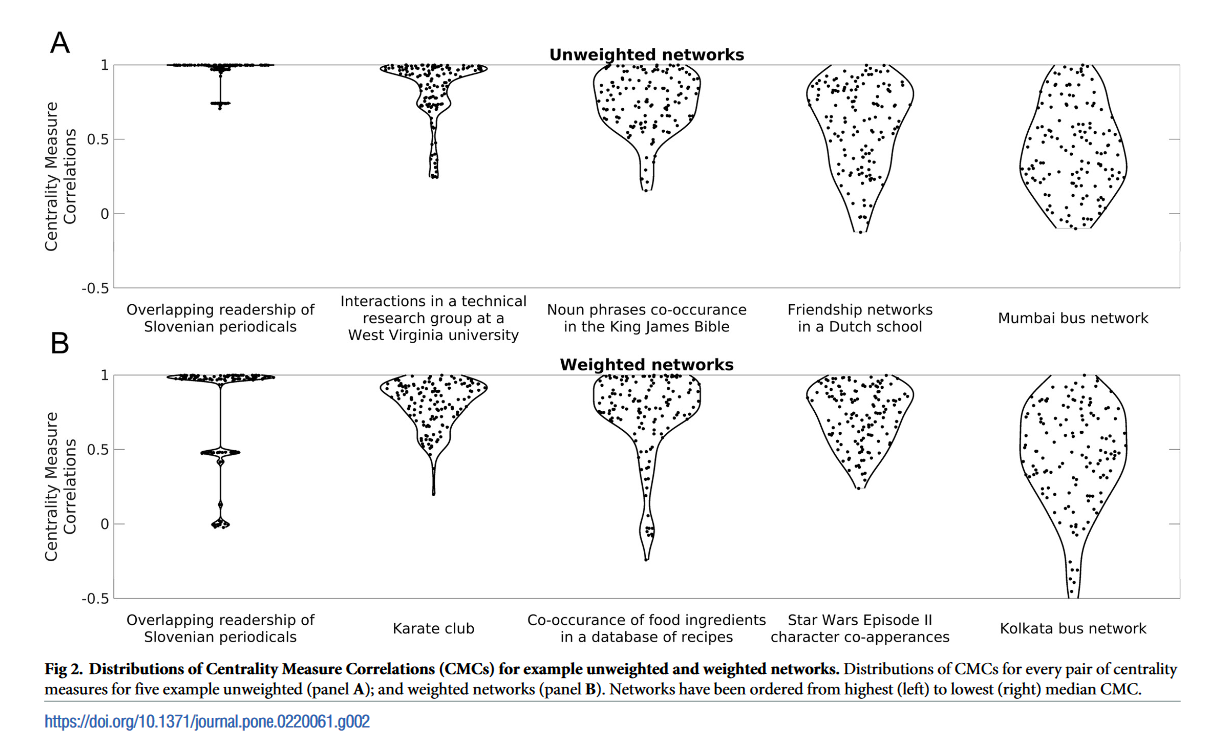

In [59]:
correlation

In [60]:
florentine_marriage = Image("./figs/florentine_marriage.PNG")
# The following Fgure provides the links between the key families in Florence at that time, where a link represents a marriage between members of the two linked families

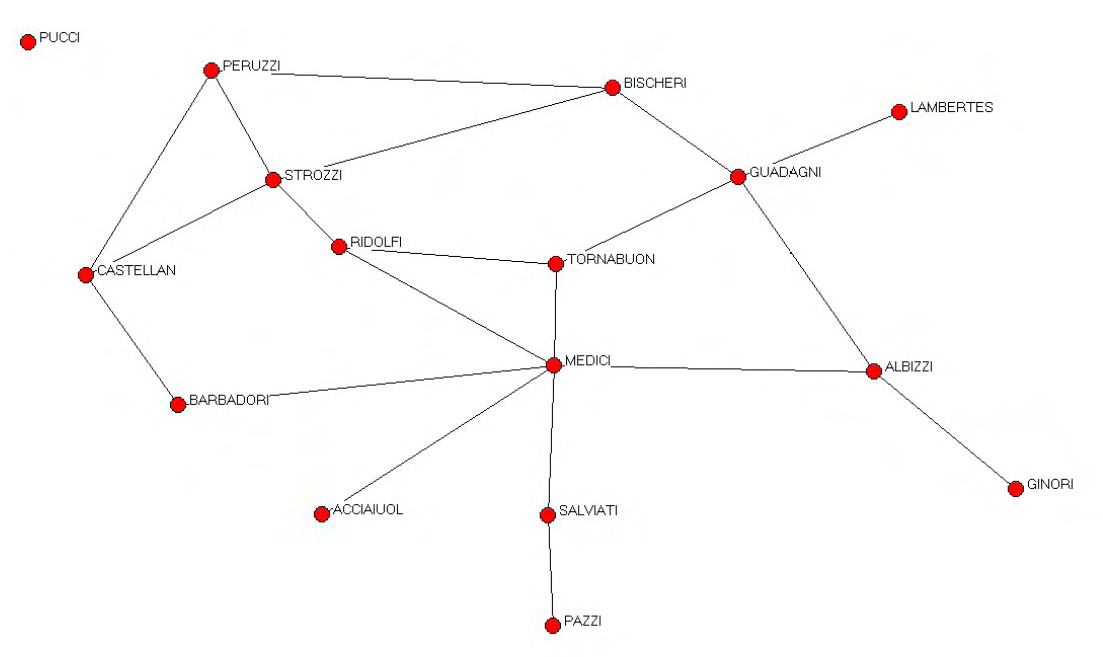

In [61]:
florentine_marriage

In [62]:
# This measure of betweenness for the
# Medici is .522. That means that if we look at all the shortest paths between various
# families (other than the Medici) in this network, the Medici lie on over half of them! In
# contrast, a similar calculation for the Strozzi comes out at .103, or just over ten percent.
# The second highest family in terms of betweenness after the Medici is the Guadagni
# with a betweenness of .255. To the extent that marriage relationships were keys to
# communicating information, brokering business deals, and reaching political decisions,
# the Medici were much better positioned than other families, at least according to this
# notion of betweenness.

# Reference: Jackson, M. O. (2010). Social and economic networks. Princeton university press.

# Question) You are the marketing manager of a company and you would like to launch a campaign for your company's new product. Your strategy is to use influencers marketing. To whom do you talk to? what kind of influencer?

# Question) You are working in the Police communication department. You receive a news about a terroristic attack in city X. You want to let everybody knows as soon as possible. In addition to traditional media and Police account in social media, you ask a few of influencers to share the news. To whom do you talk to? what kind of influencer?¶

# Structural Metrics
- Community
- Homophily

In [63]:
community_1 = Image('./figs/community1.PNG')
community_2 = Image('./figs/community2.PNG')

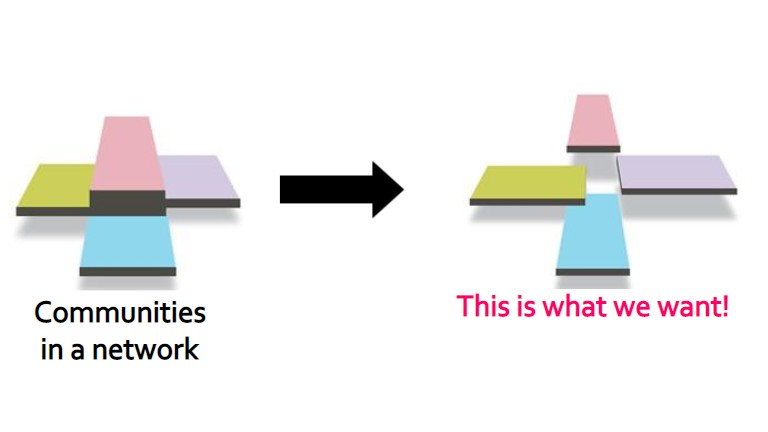

In [64]:
community_1

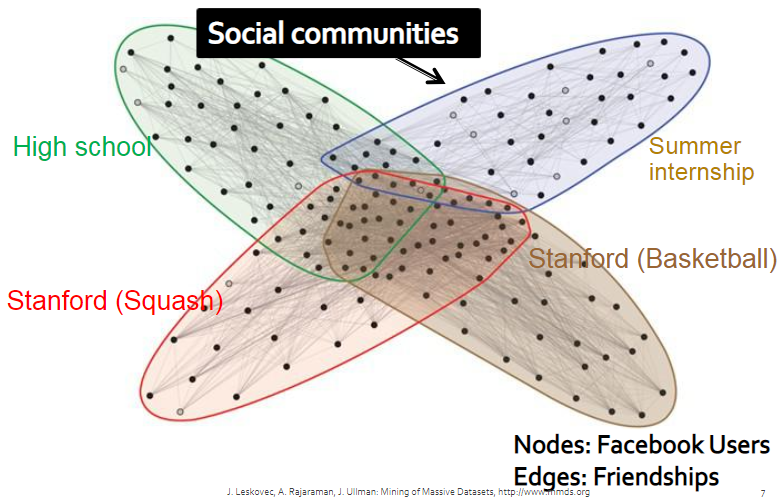

In [65]:
community_2

Reference: Mining of the Massive Datasets, Jure Leskovec

In [66]:
# The functions in this class are not imported into the top-level networkx namespace. You can access these functions by importing the networkx.algorithms.community module, then accessing the functions as attributes of community
# This class implemented Newman-Girvan method
# The other very popular community detection method is the Louvain method which is implemented in Gephi
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))

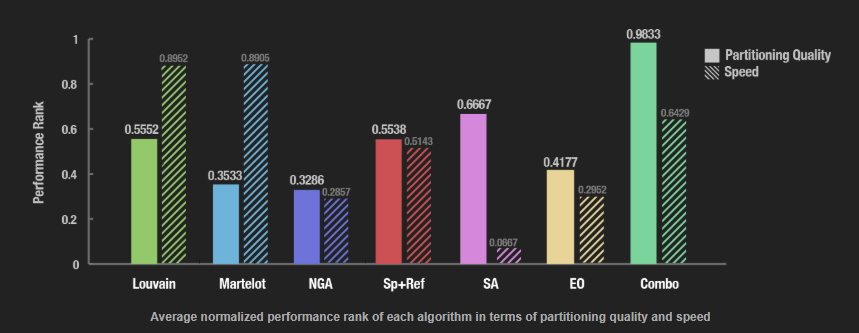

In [67]:
image7 = Image('./figs/community3.PNG')
image7

# Homophily
One related topic to community detection is homophily. Two interesting examples:
    * School children
    * Segregation

In [68]:
image8 = Image('./figs/homophily1.PNG')

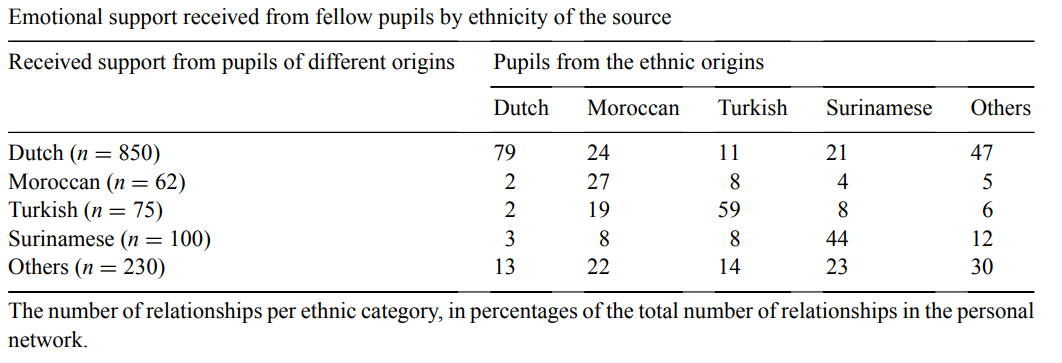

In [69]:
image8

In [70]:
image9 = Image('./figs/homophily2.PNG')

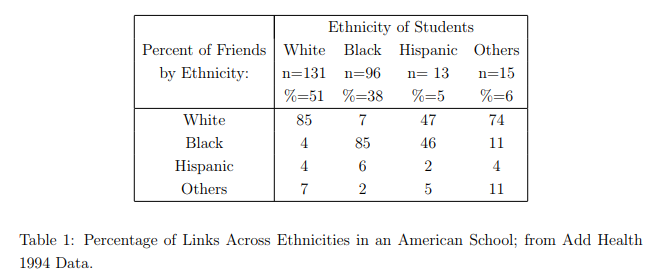

In [71]:
image9

In [77]:
school_homophily_network = Image("./figs/school_homophily_network.PNG")

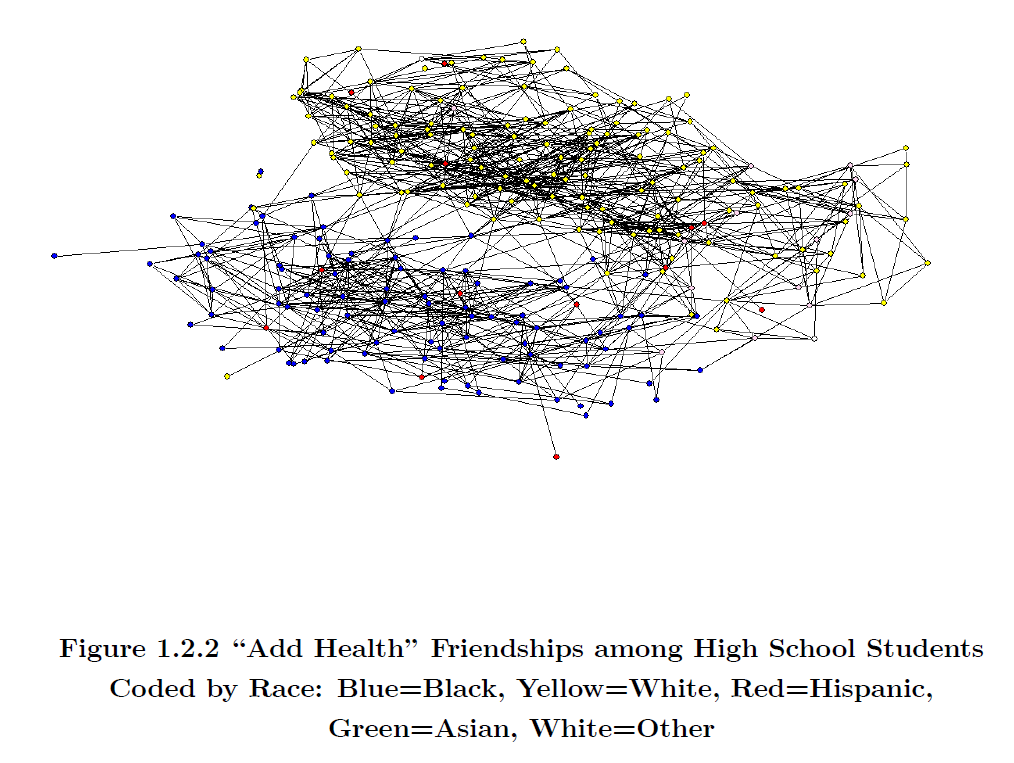

In [78]:
school_homophily_network

In [72]:
homophily = Image('./figs/homophily3.PNG')

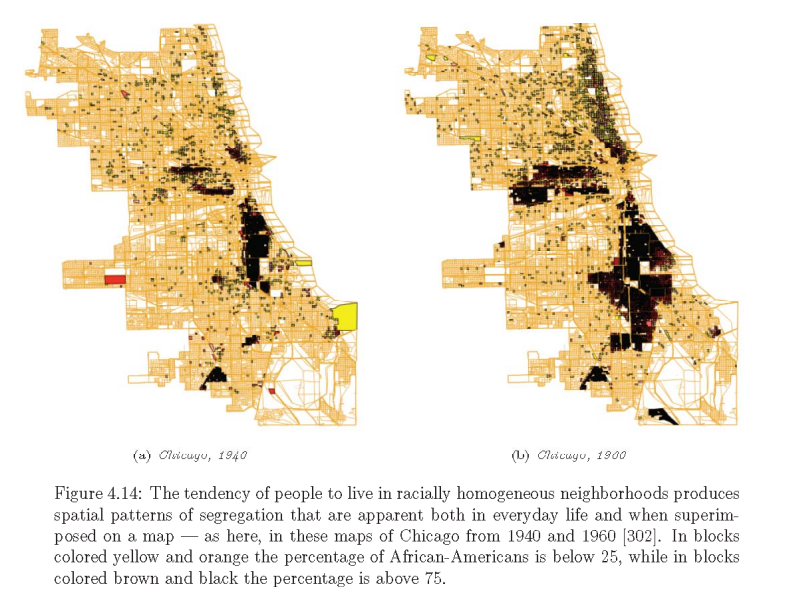

In [73]:
homophily

References: 
    * Baerveldt, C., Van Duijn, M. A., Vermeij, L., & Van Hemert, D. A. (2004). Ethnic boundaries and personal choice. Assessing the influence of individual inclinations to choose intra-ethnic relationships on pupils’ networks. Social Networks, 26(1), 55-74.
    * Currarini, S., Jackson, M. O., & Pin, P. (2009). An economic model of friendship: Homophily, minorities, and segregation. Econometrica, 77(4), 1003-1045.
    * Easley, D., & Kleinberg, J. (2010). Networks, crowds, and markets: Reasoning about a highly connected world. Cambridge University Press.

- Advanced topics
    - Erdos-Renyi random graphs
    - Scale Free Network

In [74]:
ERG = nx.erdos_renyi_graph(1000,0.2)
SFN = nx.scale_free_graph(1000)
SMW = nx.watts_strogatz_graph(1000,3,0.1)

In [75]:
image11 = Image('./figs/randomNetwork1.PNG')

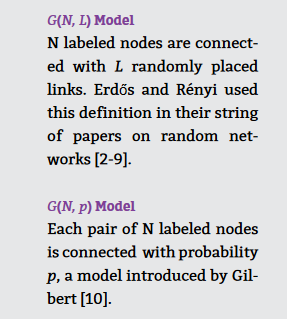

In [104]:
image11

In [105]:
image12 = Image('./figs/randomNetwork2.PNG')

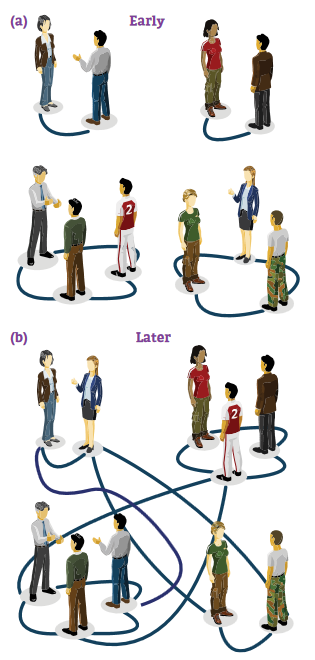

In [106]:
image12

In [107]:
image13 = Image('./figs/scale-free.PNG')

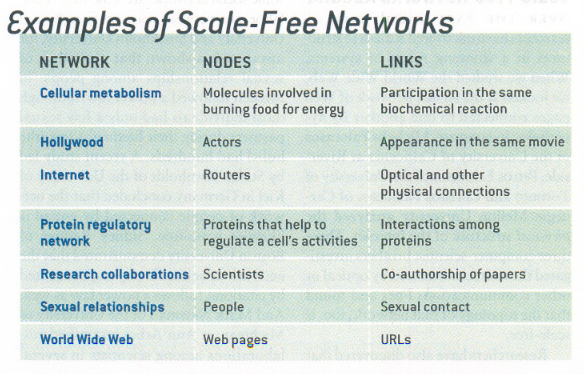

In [108]:
image13

In [109]:
image16 = Image('./figs/scale-free2.PNG')

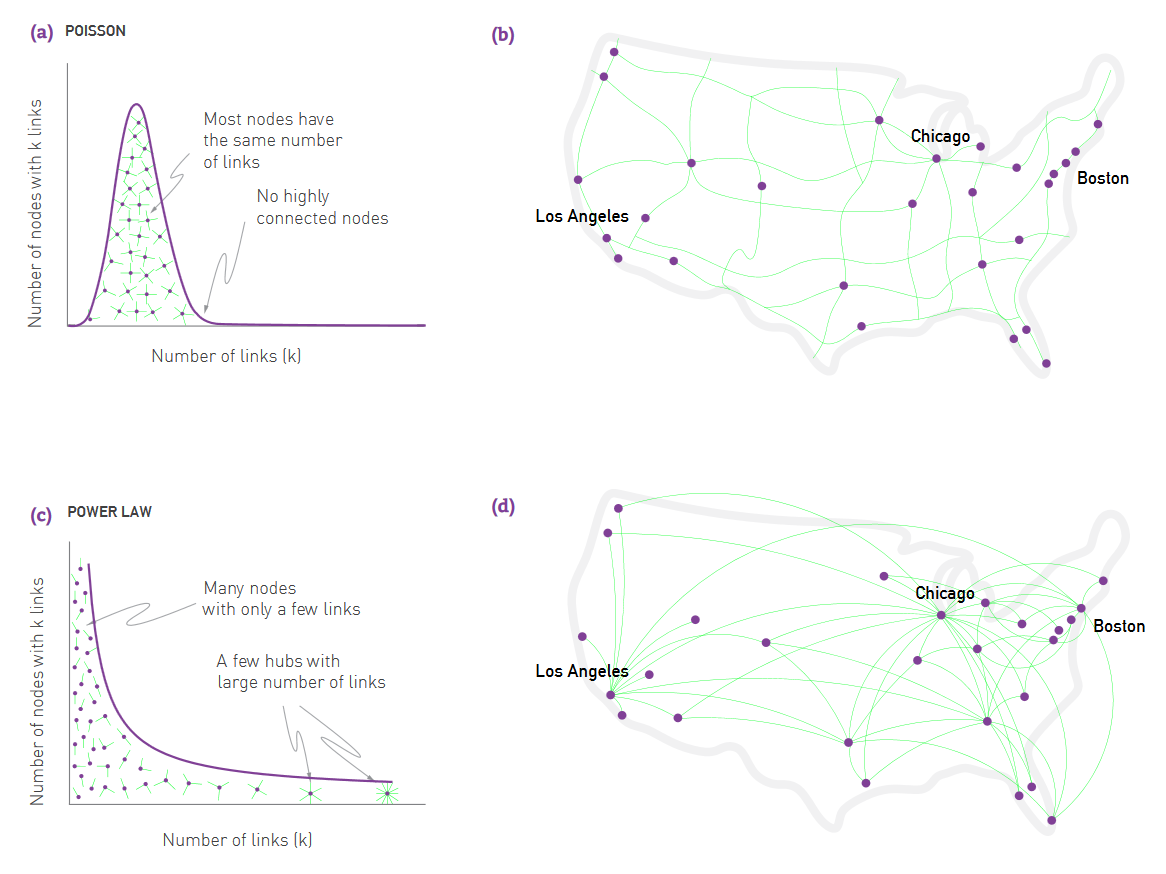

In [110]:
image16

Reference:
    * Barabási, A. L., & Bonabeau, E. (2003). Scale-free networks. Scientific american, 288(5), 60-69.
    * Barabási, A. L. (2016). Network science. Cambridge university press.

### Challenge 1
Make a random directed graph with 50 nodes and give a random weight from 1 to 10 to each edge. Then visualize the graph regarding two following conditions:
1- The size of the nodes should be associated with the nodes degree
2- The thickness of each edge should be associted with edge weights
3- The colour of nodes has to be associated with their degree in a way that as the degree of a node increases the colour of that node becomes more sharp
3- The colour of edges has to be associated with their weights in a way that as the weight of an edge increases the colour of that edge becomes more sharp

D:\Users\aebrahimifard\AppData\Local\Continuum\anaconda3\envs\myenv03\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
D:\Users\aebrahimifard\AppData\Local\Continuum\anaconda3\envs\myenv03\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


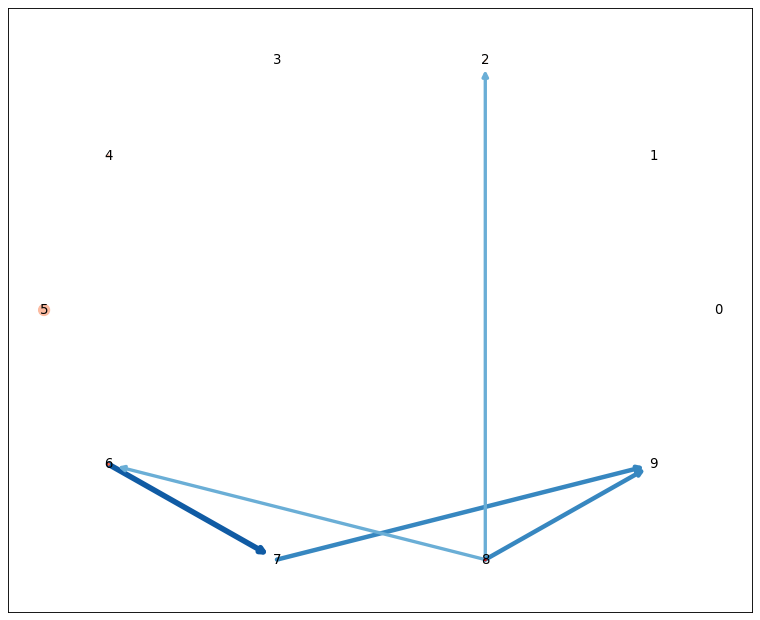

In [111]:
G = nx.erdos_renyi_graph(10, 0.1, directed=True)
inDeg = dict(G.in_degree())
outDeg = dict(G.out_degree())
for edge in G.edges:
    G[edge[0]][edge[1]]["weight"] = random.randint(1,5)
edgeWeights = [u[2]["weight"] for u in G.edges.data()]

# Making the colour palette and linking it the edges according to theor weights
colourPalette = sns.color_palette("Blues",5)
edgeWeighColour = dict(zip(range(1,6),colourPalette))
for edge in G.edges:
    G[edge[0]][edge[1]]["colour"] = edgeWeighColour[G[edge[0]][edge[1]]["weight"]]
edgeColours = [u[2]["colour"] for u in G.edges.data()]   

# Associating the color of the nodes with the their out-degree
outDegUnique = np.unique([i for i in outDeg.values()])
colourPalette = sns.color_palette("Reds",len(outDegUnique))
nodeOutDegDict = dict(zip(outDegUnique,colourPalette))
for i in G.nodes:
    G.nodes[i]["colour"] = nodeOutDegDict[outDeg[i]]
nodeColour = [i[1]["colour"] for i in G.nodes.data()]
    
# This line makes the figure bigger
plt.figure(num=None, figsize=(12, 10), dpi=80)

# Setting the layout, nodes, edges and lables
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[(u,100*inDeg[u]) for u in inDeg], node_color=nodeColour)
nx.draw_networkx_edges(G, pos, width=edgeWeights, edge_color=edgeColours)
nx.draw_networkx_labels(G, pos)

# Drawing the network
plt.show()

### Challenge 2
Compute the correlation between the introduced centrality measures over three datasets

# 6) Epidemiology

Epidemic processes are very important in both network science and its applications. The most common application is to study the was in which diseases progress in different network conditions, depending on their infectiousness and other properties. Typically such processes are modelled as a compartmented model of disease with conditional probabilities for moving between compartments (familiar to computer scientists as stochastic finite state machines)(from https://pythonhosted.org/epydemic/). 

There are quite a few compartmental models proposed by scholars. Among them we explore four models which are the most famous ones : SI, SIS, SIR and SEIR. Please note, networkx does not support epidemic modelling per se, and we need to install a new package called NDlib which is built on the top of networkx. For more information about this library please refer to http://ndlib.readthedocs.io/en/latest/index.html

In [112]:
import ndlib.models.ModelConfig as mc

ModuleNotFoundError: No module named 'ndlib'

In [ ]:
#SI Model
# 0: Susceptible - 1: Infected
# SI assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability β: once a node becomes infected, it stays infected (the only transition allowed is S→I)
# We set the initial set of infected nodes as 5% of the overall population and a probability of infection of 1%.

import ndlib.models.epidemics.SIModel as si

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = si.SIModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

In [113]:
#SIS Model
# 0: Susceptible - 1: Infected
# SIS assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability beta, than it can be switch again to susceptible with probability lambda (the only transition allowed are S→I→S).
# we set the initial set of infected nodes as 5% of the overall population, a probability of infection of 1%, and a probability of recovery of 0.5%.

import ndlib.models.epidemics.SISModel as sis

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = sis.SISModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

ModuleNotFoundError: No module named 'ndlib'

In [26]:
#SIR Model
# 0: Susceptible - 1: Infected - 2: Removed
# SIR assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability beta, than it can be switch to removed with probability gamma (the only transition allowed are S→I→R).
# we set the initial set of infected nodes as 5% of the overall population, a probability of infection of 1%, and a removal probability of 0.5%.

import ndlib.models.epidemics.SIRModel as sir

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = sir.SIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

In [264]:
#SEIR Model
# 0: Susceptible - 1: Infected - 2: Exposed - 3: Removed
# SEIR assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected after an exposition period with probability beta, than it can switch to removed with probability gamma (the only transition allowed are S→E→I→R).
# we set the initial set of infected nodes as % of the overall population, a probability of infection of 1%, a removal probability of 0.5% and an incubation period of 5% (e.g. 20 iterations)

import ndlib.models.epidemics.SEIRModel as seir

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = seir.SEIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_parameter('alpha', 0.05)
cfg.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

# 7) Dynamic Networks

Based on the talk I had with Mason Porter (Oxford Mathematics Professor), dynamic network is a wrong term and instead of that we should replace it with temporal networks. In temporal networks both nodes and edges can change. New edges can appear, old edges can change(be remove or got bigger or smaller (in terms of weight)), new nodes appear, old nodes chages (be removed or got bigger or smaller)

To model temporal networks, we consider a time period and in each tick during this period we record the state of all elements. One of the best way to visualize temporal networks is Gephi but we need to give it the write input which has a special format. It is called gexf format. When we make a graph networkx can store it in this format, so to have a temporal networks, we create every snapshot of our network in networkx, then store that snapshot in gexf format. But still Gephi cannot identify the temporal dimension in the input and the created files need to be modified.

In [15]:
##### In the second line of each gexf file, there is this line of code:
########### <graph defaultedgetype="undirected" mode="static" name="">
##### and it should be replaced with the following line:
########### <graph mode="slice" defaultedgetype="directed" timerepresentation="timestamp" timestamp="2016">
##### The timestamp and edgetype should change due to the case

# 8) Online Social Network

There are quite a few online social networks outside; however, we decided to work with Twitter network becasue (i) Despite its limitation (collecting data only from past seven days and getting only 1% of available data), Twitter is one of the few social networks that allows data collection, (ii) also, it's one of the most dynamic social networks which almost every social, political and economic topic will be reflected in it. 

In order to get data from Twitter, first you need to make a developer account. To do that you have to go this website https://apps.twitter.com/ and create an application (filling the form and explaining for what application you need to get Twitter API). After filling the form, go the the "Keys and Access Tokesn" and take four following codes: API Key, API Secret, Access Token, Access Token Secret.

In [28]:
API_Key = ""
API_Secret = ""
Access_Token = ""
Access_Token_Secret =""

Twitter has two kind of API: (i) Search API which allows you to get access to historical data (not older than past 7 days), and (ii) Stream API which allows you to get access to the data that are currently comming to the Twitter. Here, we work with first type type of Twitter API, for working with second type of API, please refer to the files that comes with this notebook.
Also, for getting further information about these two kinds of API, please refer to http://140dev.com/twitter-api-programming-tutorials/aggregating-tweets-search-api-vs-streaming-api/

We can directly use Twitter API with HTTP request and related libraries in different programming languages, but becasue it is a fairly hard task and needs lots of efforts, programmers started writing something called Wrapper, which makes connection to the APIs very easy. For Twitter, there are quite a few wrapper in various programming languages. For Python two of the most popular APIs are Tweepy and Twython. Here, we used Tweepy

In [4]:
import tweepy

# Connecting to Twitter
auth = tweepy.auth.OAuthHandler(API_Key, API_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth)

In [5]:
# tweetObject = api.get_status(tweet.split("\t")[1], tweet_mode="extended")

In [ ]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

* Bipartite networks and their projections

In [52]:
from networkx.algorithms import bipartite

In [53]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

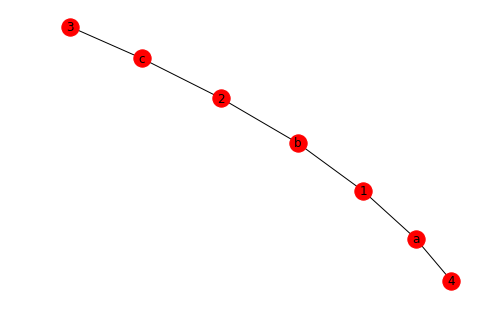

In [54]:
nx.draw(B, with_labels=True, pos=nx.fruchterman_reingold_layout(B))
plt.show()

In [55]:
bottom_nodes, top_nodes = bipartite.sets(B)

In [56]:
bottom_nodes

{1, 2, 3, 4}

In [57]:
top_nodes

{'a', 'b', 'c'}